# Tutorial do programa Phase diagram 

Um diagrama de fases em físico-química é um tipo de gráfico usado para mostrar as condições (pressão, temperatura, volume, etc.) nas quais fases termodinamicamente distintas ocorrem e coexistem em equilíbrio. Os componentes comuns de um diagrama de fases são linhas de equilíbrio ou limites de fase, que se referem a linhas que marcam as condições sob as quais várias fases podem coexistir em equilíbrio. As transições de fase ocorrem ao longo das linhas de equilíbrio. 

Os diagramas de fase mais simples são diagramas de pressão-temperatura de uma única substância, como a água. Os eixos correspondem à pressão e temperatura. O diagrama de fase mostra, no plano pressão-temperatura, as linhas de equilíbrio ou limites de fase entre as três fases de sólido, líquido e vapor. 

## Relação Clausius-Clapeyron 

A relação Clausius-Clapeyron é uma forma de caracterizar uma transição de fase descontínua entre duas fases da matéria de um único constituinte. Em um diagrama de pressão-temperatura (P-T), a linha que separa as duas fases é conhecida como curva de coexistência. A relação Clausius-Clapeyron fornece a inclinação das tangentes a esta curva. Matematicamente,

$$
\frac{\mathrm{d} P}{\mathrm{d} T} = \frac{L}{T \Delta V} = \frac{\Delta S}{\Delta V}
$$

onde: 
* $\frac{\mathrm{d} P}{\mathrm {d} T} $ é a inclinação da tangente à curva de coexistência em qualquer ponto;
* $L$ é o calor latente específico;
* $T$ é a temperatura;
* $\Delta V$ é a variação de volume da transição de fase; e 
* $\Delta S$ é a variação de entropia da transição de fase.

As seguintes equações são derivadas da relação acima e são usadas neste projeto.

### Limite sólido-líquido

$$
P(T) = P_{TP} + \frac{\Delta_{\mathrm{f}} \overline{H}}{\Delta_{\mathrm{f}} \overline{V}} \ln{\left( \frac{T}{T_{TP}} \right)}
$$

onde:
* $P_{TP}$ é a pressão no ponto de triplo; 
* $\Delta_{\mathrm{f}} \overline{H}$ é a variação de entalpia molar de fusão;
* $\Delta_{\mathrm{f}} \overline{V}$ é a variação do volume molar de fusão;
* $T_{TP}$ é a temperatura no ponto triplo.

### Limite sólido-vapor

$$
P(T) = P_{TP} \exp \left[ \frac{\Delta_{\mathrm{sub}} \overline{H}}{R} \left(\frac{1}{T_{TP}} - \frac{1}{T
} \right) \right] 
$$

onde:
* $P_{TP}$ é a pressão no ponto triplo; 
* $\Delta_{\mathrm{sub}} \overline{H}$ é a variação de entalpia molar de sublimação;
* $T_{TP}$ é a temperatura no ponto triplo.

### Limite líquido-vapor
$$
P(T) = P_{TP} \exp \left[ \frac{\Delta_{\mathrm{vap}} \overline{H}}{R} \left(\frac{1}{T_{TP}} - \frac{1}{T
} \right) \right] 
$$

onde:
* $P_{TP}$ é a pressão no ponto triplo;;
* $\Delta_{\mathrm{vap}} \overline{H}$ é a variação de entalpia molar de vaporização;
* $T_{TP}$ é a temperatura no ponto triplo.

## Equação de Antoine 

A equação de Antoine é uma classe de correlações semi-empíricas que descrevem a relação entre a pressão de vapor e a temperatura para substâncias puras. A equação de Antoine é derivada da relação Clausius-Clapeyron.

$$
\log_{10}(P) = A - \frac{B}{C+T}
$$

onde: 
* $P$ é a pressão de vapor;
* $T$ é a temperatura; 
* $A$, $B$ e $C$ são as constantes específicas dos componentes.

Normalmente, quando aplicamos a equação de Clausius-Clapeyron à transição de fase líquido-vapor, fazemos uma aproximação ($V_l≪V_v$) e uma suposição (pressão de saturação baixa). No entanto, a pressão de saturação pode não ser baixa, invalidando a suposição. A equação de Antoine, como forma modificada, é mais precisa, especialmente em alta pressão de saturação. Por padrão, o presente programa plota a curva líquido-vapor com a equação de Antoine. O usuário pode alterar essa configuração conforme demonstrado no tutorial a seguir.

## Usando o pacote com exemplo da água

Primeiro, vamos importá-lo

In [1]:
from phase_diagram.phase_diagram import PhaseDiagram

Um objeto do `PhaseDiagram` pode ser criado passando uma string com uma fórmula, um nome em minúsculas ou um número CAS.

In [2]:
water = PhaseDiagram('water')

O nome, fórmula e número CAS do objeto podem ser facilmente confirmados:

In [3]:
water.name

'water'

In [4]:
water.formula

'H2O'

In [5]:
water.cas

'7732-18-5'

Pode-se facilmente consultar os dados de um objeto. Os seguintes atributos/métodos públicos estão disponíveis.

In [6]:
[i for i in dir(water) if not i.startswith('_')]

['alternative_names',
 'antoine',
 'antoine_lv',
 'antoine_si',
 'boiling_point',
 'cas',
 'clapeyron_lv',
 'clapeyron_sl',
 'clapeyron_sv',
 'compound',
 'critical_point',
 'density_liquid',
 'density_solid',
 'density_table',
 'enthalpy_fusion',
 'enthalpy_sublimation',
 'enthalpy_vaporization',
 'format_formula',
 'formula',
 'idx',
 'melting_point',
 'molar_mass',
 'name',
 'number_of_points',
 'physical_state',
 'plot',
 'plot_custom',
 'triple_point',
 'ureg',
 'volume_change_fusion']

O arquivo `readme.md` na pasta data deste repositório tem o significado para cada atributo mostrado acima. Há também um *Diagrama de Relacionamento de Entidade* demonstrando o relacionamento de cada tabela no banco de dados.

O pacote usa a biblioteca [pint](https://pint.readthedocs.io/en/stable/) para que os dados tenham unidades:

In [7]:
water.triple_point.temperature

273.16 <Unit('kelvin')>

Há algumas formas de ter os valores dos atributos dos objetos acessados. A primeira é passar o objeto criado com o atributo requerido. Essa saída será em forma de tupla nomeada:

In [8]:
water.triple_point

point(temperature=<Quantity(273.16, 'kelvin')>, pressure=<Quantity(611.657, 'pascal')>)

In [9]:
water.melting_point

point(temperature=<Quantity(273.15, 'kelvin')>, pressure=<Quantity(101325.0, 'pascal')>)

In [10]:
water.antoine

antoine(Tmin=0.01, Tmax=373.98, A=8.05573, B=1723.6425, C=233.08)

Para ter a saída de apenas um valor, basta especificar o que deseja daquele atributo:

In [11]:
water.triple_point.temperature

273.16 <Unit('kelvin')>

No caso acima estamos demonstrando que queremos saber a temperatura do ponto triplo da água. Outros exemplos para maior entendimento:

In [12]:
water.melting_point.pressure

101325.0 <Unit('pascal')>

In [13]:
water.antoine.A

8.05573

Então sempre que quiser especificamente algum dado de um atributo, basta passar o seguinte:
`nome_do_objeto.nome_do_atributo.especificacao_do_atributo`

## antoine vs antoine_si

Há dois atributos com as constantes de Antoine para os objetos. No atributo `antoine` os valores de temperatura estão em °C. Já no atributo `antoine_si` os valores de temperatura estão em K. Há diferença entre as constantes `A`, `B` e `C` dos dois atributos, tendo em vista que as constantes também dependem da temperatura:

In [14]:
water.antoine_si

antoine_si(Tmin=273.15999999999997, Tmax=647.13, A=10.18063302013294, B=1723.6425, C=-40.069999999999965)

In [15]:
water.antoine

antoine(Tmin=0.01, Tmax=373.98, A=8.05573, B=1723.6425, C=233.08)

## Gráficos

Para visualizar o gráfico de seu objeto, basta usar o método `plot`. Por padrão, o gráfico possui uma escala logarítmica e unidades SI:

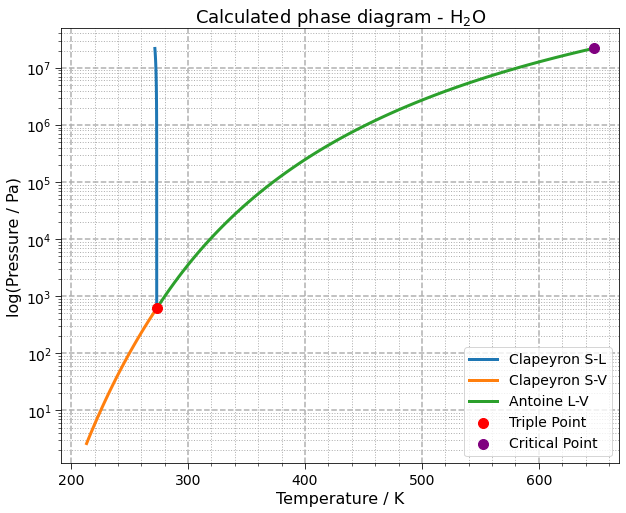

In [16]:
water.plot()

Qualquer unidade disponível no pacote [pint](https://pint.readthedocs.io/en/stable/) pode ser passada para o método conforme mostrado abaixo:

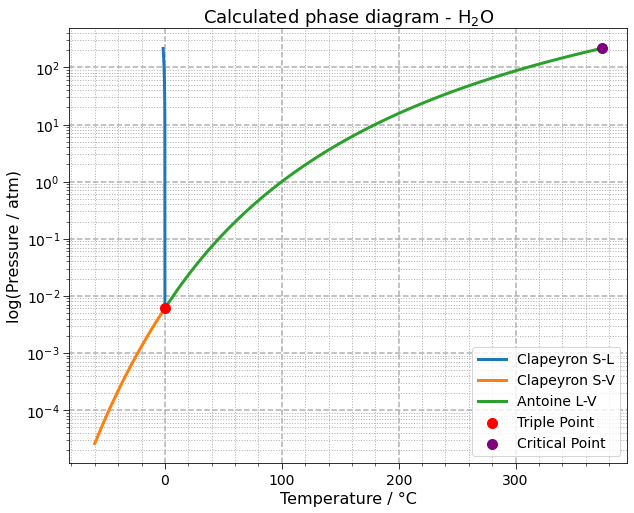

In [17]:
water.plot(T_unit='°C', P_unit='atm')

Se uma escala de pressão não logarítmica for desejada, passe `scale_log=False`:

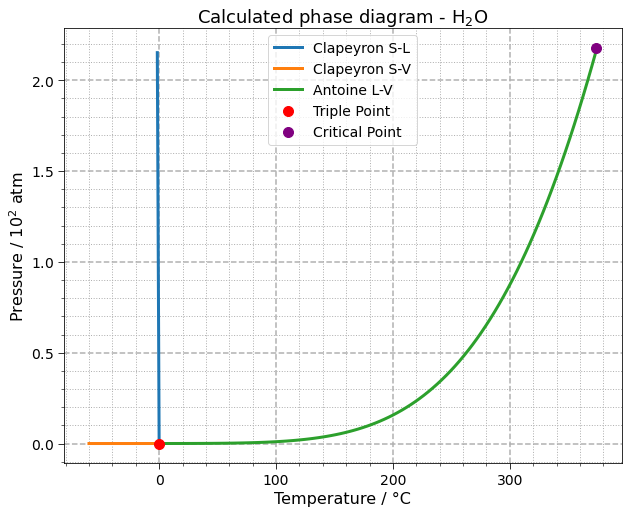

In [18]:
water.plot(T_unit='°C', P_unit='atm', scale_log=False)

O texto do título também pode ser alterado usando `title_text`:

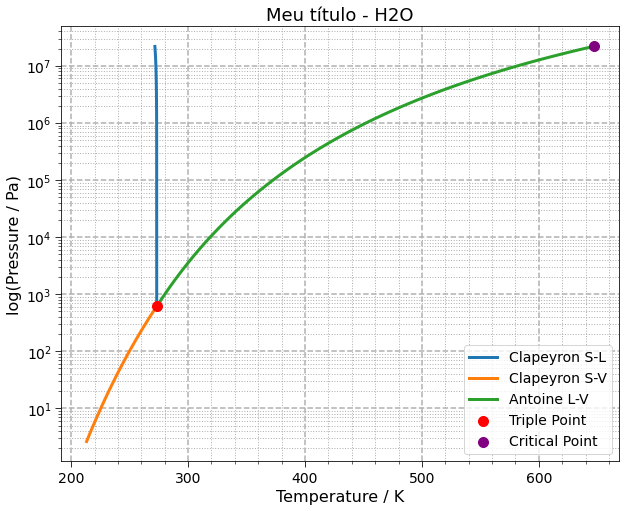

In [19]:
water.plot(title_text = 'Meu título - H2O')

Se uma fórmula química bem formatada for desejada, use o método `format_formula`:

In [20]:
meu_titulo = 'Meu titulo - ' + water.format_formula()

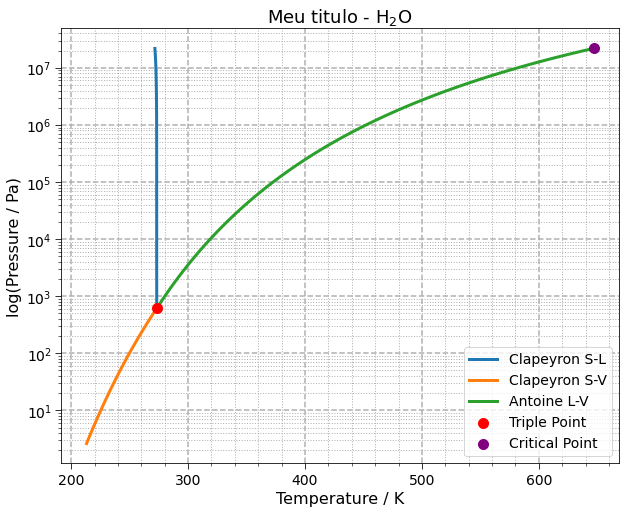

In [21]:
water.plot(title_text = meu_titulo)

Por padrão, as curvas sólido-líquido, sólido-vapor e líquido-vapor de Antoine são plotados. Porém pode ser alterado plotando também a curva líquido-vapor de Clausius-Clapeyron. Para isso basta passar `clapeyron_lv=True`

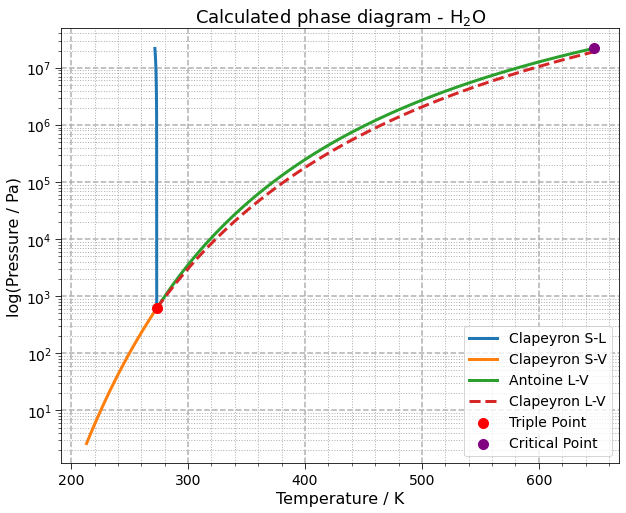

In [22]:
water.plot(clapeyron_lv=True)

O método `plot` retorna um objeto `matplotlib.axes._subplots.AxesSubplot`. Portanto, pode ser facilmente incluído em uma figura previamente criada por uma figura do Matplotlib. O método também recebe eixos opcionais onde os dados devem ser plotados. Então, vamos criar uma figura com 4 formas diferentes de diagramas de fases da água:

In [23]:
import matplotlib.pyplot as plt

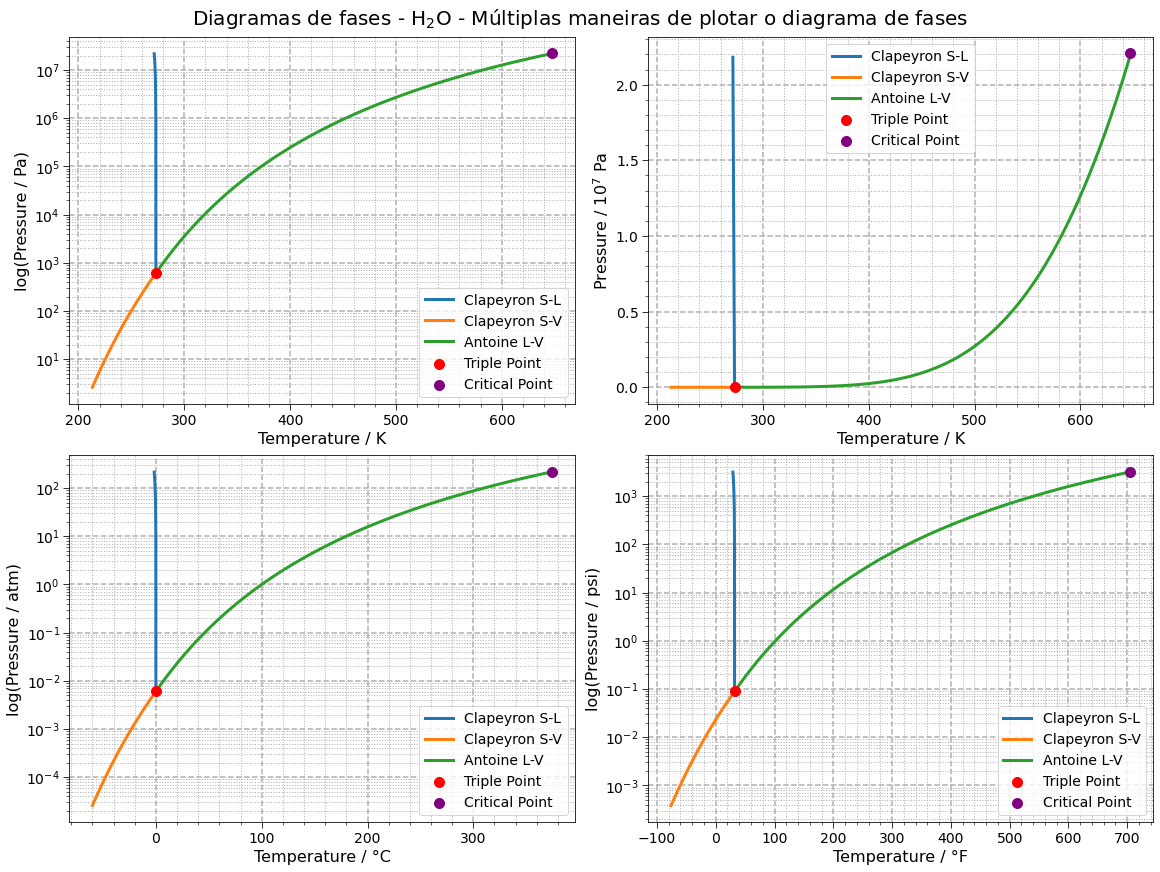

In [24]:
fig, arr = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), constrained_layout=True,
                       facecolor=(1, 1, 1))
water.plot(ax=arr[0,0], title=False)
water.plot(ax=arr[0,1], title=False, scale_log=False)
water.plot(ax=arr[1,0], title=False, P_unit='atm', T_unit='°C')
water.plot(ax=arr[1,1], title=False, P_unit='psi', T_unit='°F')

plot_title = 'Diagramas de fases - ' + water.format_formula() + ' - Múltiplas maneiras de plotar o diagrama de fases'
fig.suptitle(plot_title, fontsize=20)

plt.show()

## Outros exemplos

Há outros compostos disponíveis. Vejamos as mesmas opções básicas com alguns desses outros compostos.

In [25]:
co2 = PhaseDiagram('CO2')

In [26]:
co2.cas

'124-38-9'

In [27]:
co2.name

'carbon dioxide'

In [28]:
co2.formula

'CO2'

In [29]:
co2.triple_point.temperature

216.58 <Unit('kelvin')>

In [30]:
co2.triple_point.pressure

518500.0 <Unit('pascal')>

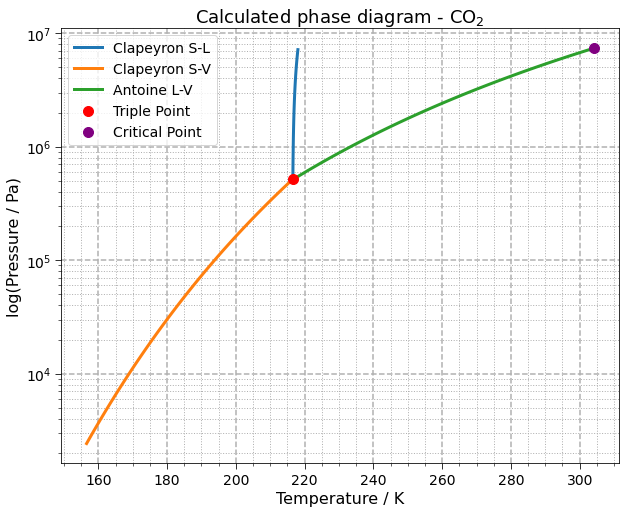

In [31]:
co2.plot()

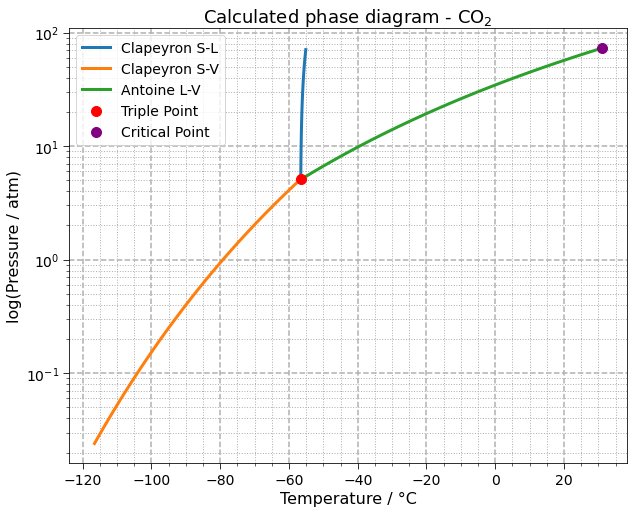

In [32]:
co2.plot(T_unit='°C', P_unit='atm')

In [33]:
meu_titulo_co2 = 'Meu titulo - ' + co2.format_formula()

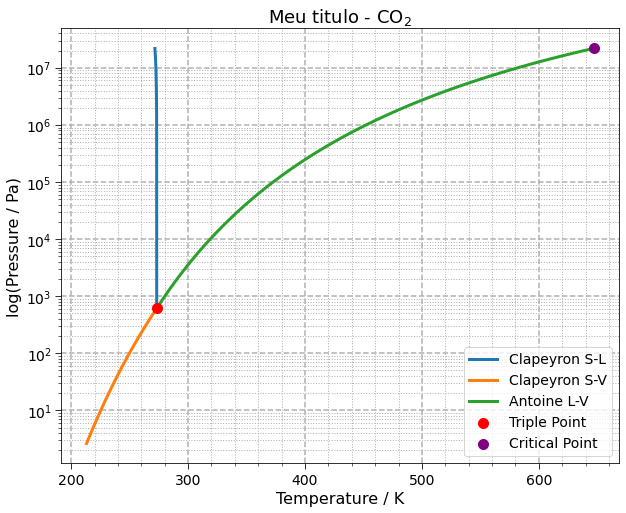

In [34]:
water.plot(title_text = meu_titulo_co2)

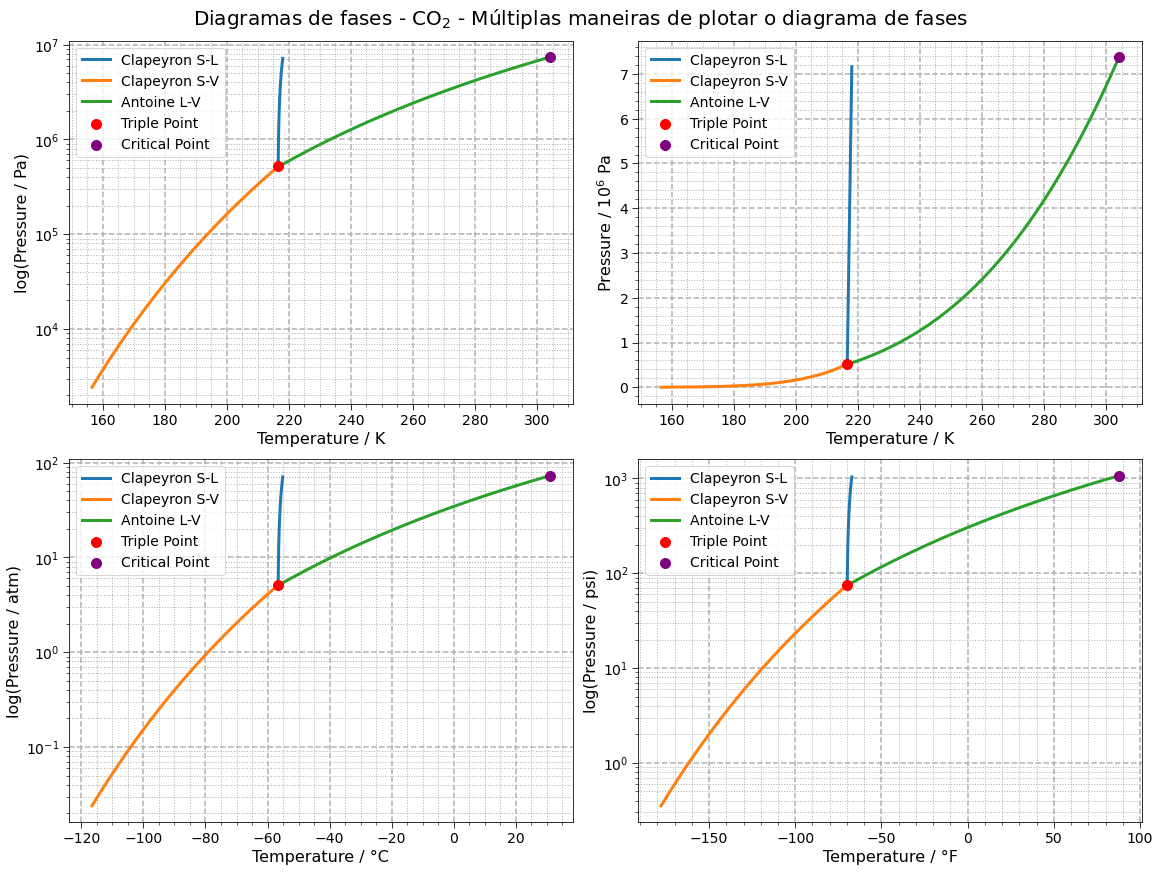

In [35]:
fig, arr = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), constrained_layout=True,
                       facecolor=(1, 1, 1))
co2.plot(ax=arr[0,0], title=False)
co2.plot(ax=arr[0,1], title=False, scale_log=False)
co2.plot(ax=arr[1,0], title=False, P_unit='atm', T_unit='°C')
co2.plot(ax=arr[1,1], title=False, P_unit='psi', T_unit='°F')

plot_title = 'Diagramas de fases - ' + co2.format_formula() + ' - Múltiplas maneiras de plotar o diagrama de fases'
fig.suptitle(plot_title, fontsize=20)

plt.show()